# 1. INITIAL SETUP


## Import Libraries

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np


try:
    plt.style.use('seaborn-v0_8')
except:
    plt.style.use('seaborn')

pd.set_option('display.max_columns', 50)
print("Libraries imported successfully")

Libraries imported successfully


## Load Data

In [6]:
monthly = pd.read_csv('newyork_monthly_2020_2021.csv')
weekly = pd.read_csv('newyork_weekly_2020_2021.csv')



print(f"Monthly data: {len(monthly)} rows")
print(f"Weekly data: {len(weekly)} rows")
display(monthly.head(2))

Monthly data: 19264 rows
Weekly data: 83076 rows


/var/folders/p4/cs3wdqys4nq3xmct9w92dbj40000gn/T/ipykernel_30574/1223335653.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  weekly = pd.read_csv('newyork_weekly_2020_2021.csv')


,type,GEOID,racial_majority,month,filings_2020,filings_avg,last_updated
0,Zip Code,10001,White,01/2020,0,55.000000,2025-04-12
1,Zip Code,10001,White,02/2020,0,49.333333,2025-04-12


# 2. EXPLORATORY DATA ANALYSIS (EDA)


## 2.1 Data Cleaning & Transformation

### Clean Monthly Data

In [7]:

monthly['month_date'] = pd.to_datetime(monthly['month'], format='%m/%Y')

monthly['year'] = monthly['month_date'].dt.year
monthly['month_num'] = monthly['month_date'].dt.month

print("Monthly data cleaning complete. Date range:")
print(f"Start: {monthly['month_date'].min().strftime('%Y-%m')}")
print(f"End: {monthly['month_date'].max().strftime('%Y-%m')}")
display(monthly[['GEOID', 'month', 'month_date', 'filings_2020']].head(2))

Monthly data cleaning complete. Date range:
Start: 2020-01
End: 2025-04


,GEOID,month,month_date,filings_2020
0,10001,01/2020,2020-01-01,0
1,10001,02/2020,2020-02-01,0


### Clean Weekly Data

In [8]:
weekly['week_date'] = pd.to_datetime(weekly['week_date'])

weekly['year'] = weekly['week_date'].dt.year
weekly['month_num'] = weekly['week_date'].dt.month

print("Weekly data cleaning complete. Date range:")
print(f"Start: {weekly['week_date'].min().strftime('%Y-%m-%d')}")
print(f"End: {weekly['week_date'].max().strftime('%Y-%m-%d')}")
display(weekly[['GEOID', 'week_date', 'filings_2020']].head(2))

Weekly data cleaning complete. Date range:
Start: 2019-12-29
End: 2025-04-06


,GEOID,week_date,filings_2020
0,10001,2019-12-29,0
1,10001,2020-01-05,0


## 2.2 Trend Analysis & Feature Engineering


*italicized text*

### Trend Analysis

In [9]:
monthly_agg = monthly.groupby('month_date').agg({
    'filings_2020': 'sum',
    'filings_avg': 'sum'
}).reset_index()

monthly_agg['pct_change'] = ((monthly_agg['filings_2020'] - monthly_agg['filings_avg']) /
                            monthly_agg['filings_avg']) * 100

print("Trend analysis complete. Key statistics:")
display(monthly_agg.head(3))
print(f"\nMaximum percentage change: {monthly_agg['pct_change'].max():.1f}%")
print(f"Minimum percentage change: {monthly_agg['pct_change'].min():.1f}%")

Trend analysis complete. Key statistics:


,month_date,filings_2020,filings_avg,pct_change
0,2020-01-01,14536,19944.333333,-27.117143
1,2020-02-01,13307,19665.000000,-32.331554
2,2020-03-01,9055,19405.333333,-53.337570



Maximum percentage change: -27.1%
Minimum percentage change: -100.0%


## 2.3 Data Visualization

### Visualization 1 : Historical Trend Comparison

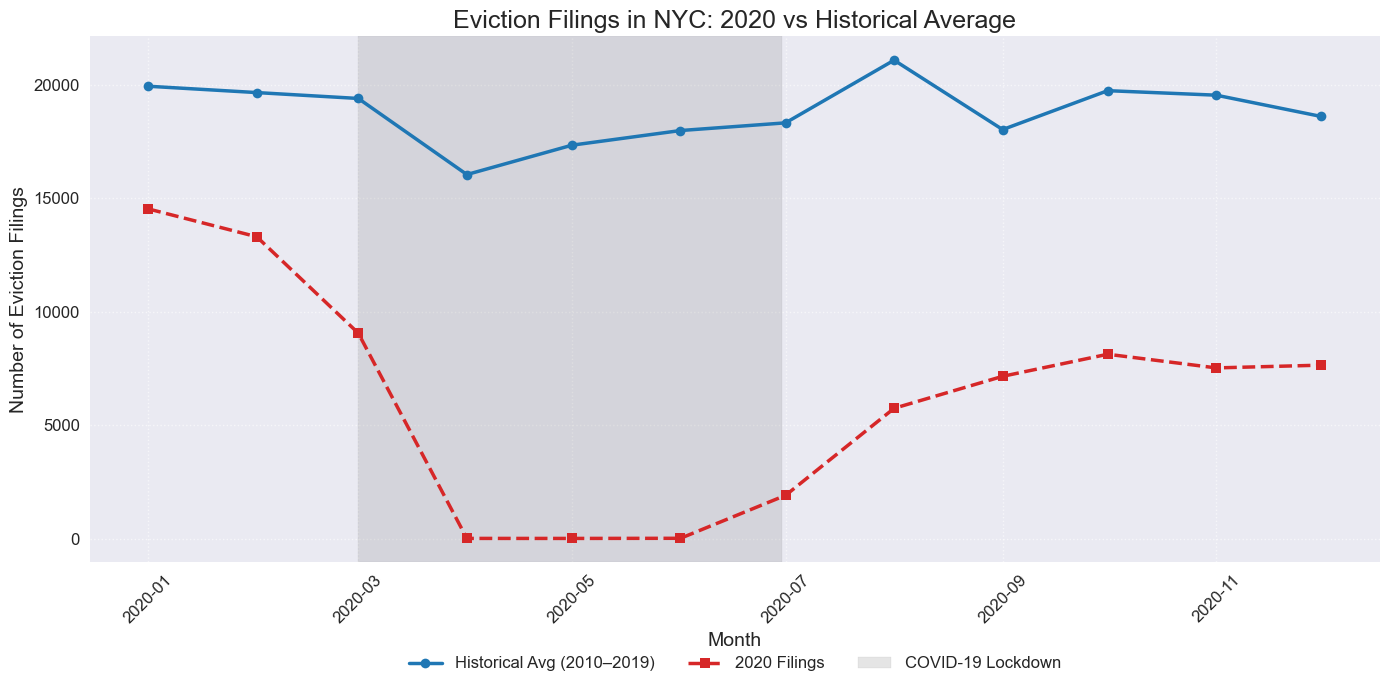

In [10]:
monthly_agg_2020 = monthly_agg[monthly_agg['month_date'].dt.year == 2020]

plt.figure(figsize=(14, 7))

plt.plot(monthly_agg_2020['month_date'], monthly_agg_2020['filings_avg'],
         label='Historical Avg (2010–2019)', color='#1f77b4',
         linewidth=2.5, marker='o')

plt.plot(monthly_agg_2020['month_date'], monthly_agg_2020['filings_2020'],
         label='2020 Filings', color='#d62728',
         linewidth=2.5, linestyle='--', marker='s')

plt.axvspan(pd.Timestamp('2020-03-01'), pd.Timestamp('2020-06-30'),
            color='gray', alpha=0.2, label='COVID-19 Lockdown')

plt.title('Eviction Filings in NYC: 2020 vs Historical Average', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Eviction Filings', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3, frameon=False)

plt.grid(True, linestyle=':', alpha=0.6)
plt.tight_layout()
plt.savefig('1_historical_trend_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


### Visualization 2:  COVID-19 Impact on NYC Eviction Filings 2020


In [ ]:

from matplotlib.ticker import MaxNLocator

monthly['month'] = pd.to_datetime(monthly['month'], format='%m/%Y')
monthly['pct_change'] = ((monthly['filings_2020'] - monthly['filings_avg']) /
                           monthly['filings_avg']) * 100
covid_2020 = monthly[monthly['month'].dt.year == 2020].copy()

fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')

def covid_color(pct):
    return '#2ca02c' if pct < 0 else '#d62728'

bars = ax.bar(covid_2020['month'].dt.strftime('%b'),
              covid_2020['pct_change'],
              color=[covid_color(x) for x in covid_2020['pct_change']],
              width=0.6, alpha=0.8, edgecolor='white', linewidth=1)

for i, month in enumerate(covid_2020['month']):
    if month.month in [3,4,5,6]:
        bars[i].set_hatch('///')
        bars[i].set_edgecolor('black')

def smart_label(ax, bars):
    for bar in bars:
        height = bar.get_height()
        if abs(height) > 5:
            offset = 3 if height > 0 else -4
            ax.text(bar.get_x() + bar.get_width()/2,
                    height + offset,
                    f'{height:.0f}%',
                    ha='center',
                    va='bottom' if height > 0 else 'top',
                    fontsize=10,
                    fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.8,
                             edgecolor='none', pad=1))

smart_label(ax, bars)

ax.set_title('NYC Eviction Filings: COVID-19 Impact (2020 vs 2010-2019 Average)',
            fontsize=16, pad=20, fontweight='bold')
ax.set_xlabel('Month', fontsize=13, labelpad=10)
ax.set_ylabel('Percentage Change', fontsize=13, labelpad=10)
ax.xaxis.set_tick_params(labelsize=12, rotation=45)
ax.yaxis.set_tick_params(labelsize=11)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))

ax.annotate('Lockdown Period', xy=(2.5, -30), xytext=(2.5, -60),
            ha='center', va='center',
            fontsize=12,
            bbox=dict(boxstyle='round,pad=0.5', fc='white', ec='black'),
            arrowprops=dict(arrowstyle='->'))

ax.axhline(0, color='black', linewidth=0.8)
ax.grid(axis='y', linestyle=':', alpha=0.4)

legend_elements = [
    plt.Rectangle((0,0),1,1, fc='#2ca02c', alpha=0.8, label='Reduction'),
    plt.Rectangle((0,0),1,1, fc='#d62728', alpha=0.8, label='Increase'),
    plt.Rectangle((0,0),1,1, fc='white', ec='black', hatch='///', label='Lockdown')
]
ax.legend(handles=legend_elements, loc='upper right',
          framealpha=1, fontsize=11)

plt.savefig('perfect_covid_impact.png', dpi=300, bbox_inches='tight')
plt.show()

### Visualization 3 : Racial Disparity Analysis

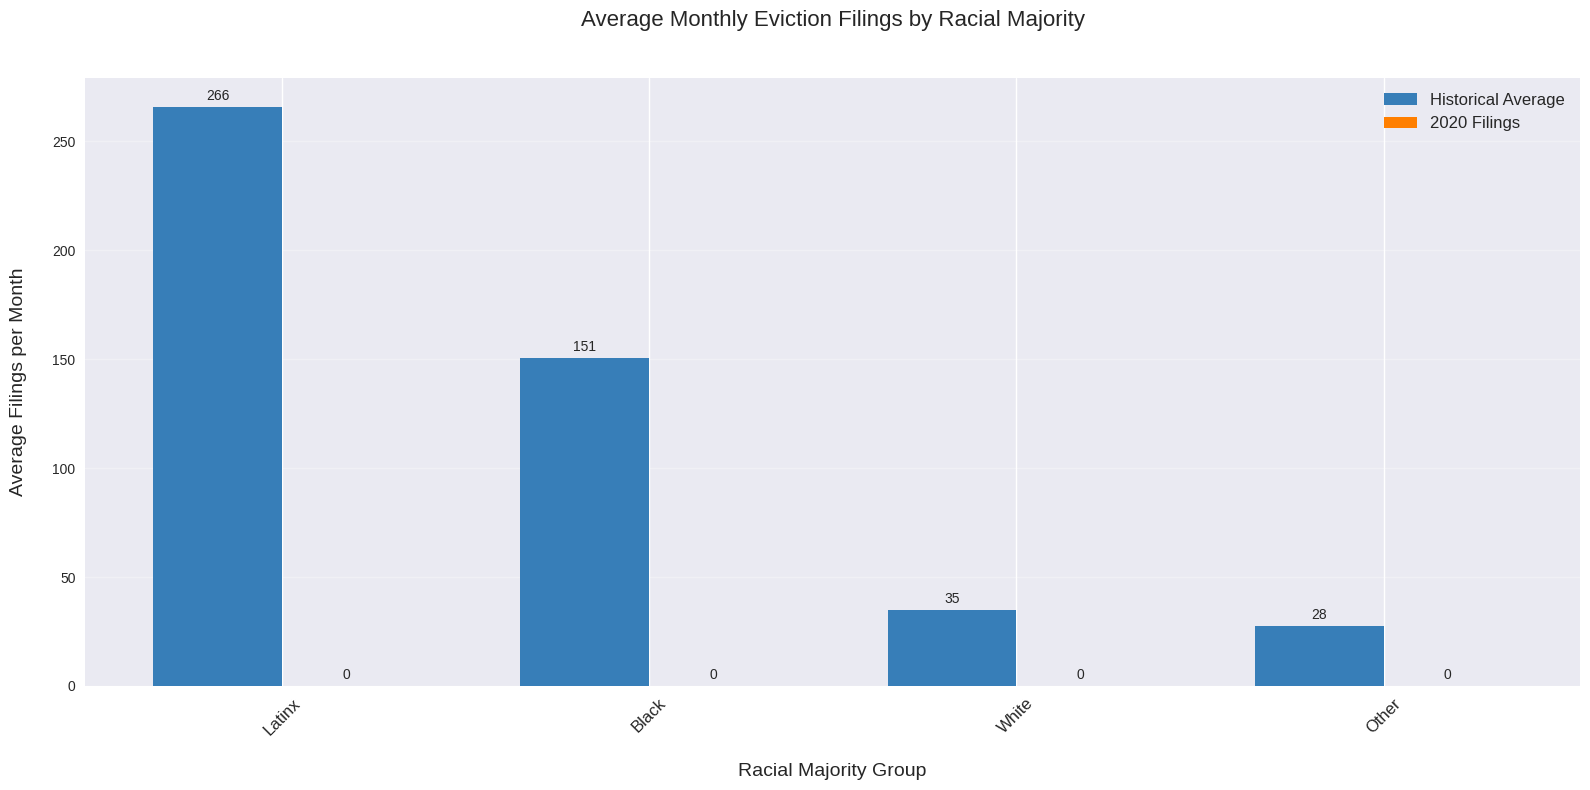

In [ ]:
if 'racial_majority' in monthly.columns:
    plt.figure(figsize=(16, 8))

    racial_avg = monthly.groupby('racial_majority').agg({
        'filings_2020': 'mean',
        'filings_avg': 'mean'
    }).sort_values('filings_avg', ascending=False)

    x = np.arange(len(racial_avg))
    width = 0.35

    bars1 = plt.bar(x - width/2, racial_avg['filings_avg'], width,
                   label='Historical Average', color='#377eb8')
    bars2 = plt.bar(x + width/2, racial_avg['filings_2020'], width,
                   label='2020 Filings', color='#ff7f00')

    plt.title('Average Monthly Eviction Filings by Racial Majority\n',
              fontsize=16, pad=20)
    plt.xlabel('\nRacial Majority Group', fontsize=14)
    plt.ylabel('Average Filings per Month\n', fontsize=14)
    plt.xticks(x, racial_avg.index, rotation=45, fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True, axis='y', alpha=0.3)

    for bars in [bars1, bars2]:
        for bar in bars:
            height = bar.get_height()
            plt.annotate(f'{height:.0f}',
                         xy=(bar.get_x() + bar.get_width() / 2, height),
                         xytext=(0, 3), textcoords='offset points',
                         ha='center', va='bottom', fontsize=10)

    plt.tight_layout()
    plt.savefig('racial_disparities.png', dpi=300, bbox_inches='tight')
    plt.show()

## Data Merging

In [ ]:
monthly_keys = monthly[['GEOID', 'year', 'month_num']].drop_duplicates()
weekly_keys = weekly[['GEOID', 'year', 'month_num']].drop_duplicates()

merged_keys = pd.merge(weekly_keys, monthly_keys, on=['GEOID', 'year', 'month_num'], how='left', indicator=True)
print(merged_keys['_merge'].value_counts())


_merge
left_only     15498
both           4068
right_only        0
Name: count, dtype: int64


In [ ]:
dup_counts = monthly.groupby(['GEOID', 'year', 'month_num']).size()
print("Number of duplicates in monthly data:", (dup_counts > 1).sum())


Number of duplicates in monthly data: 0


In [ ]:

monthly['month'] = pd.to_datetime(monthly['month'], format='%m/%Y')
monthly['year'] = monthly['month'].dt.year
monthly['month_num'] = monthly['month'].dt.month

weekly['GEOID'] = weekly['GEOID'].astype(str)
monthly['GEOID'] = monthly['GEOID'].astype(str)

dup_counts = monthly.groupby(['GEOID', 'year', 'month_num']).size()
print("Number of duplicates in monthly data:", (dup_counts > 1).sum())

merged = pd.merge(
    weekly,
    monthly,
    on=['GEOID', 'year', 'month_num'],
    how='left',
    suffixes=('_weekly', '_monthly')
)
matched_weeks = merged['month'].notna().sum()
total_weeks = len(weekly)
merge_rate = (matched_weeks / total_weeks) * 100

print("\nCorrect Merge Results:")
print(f"- Total weekly records: {total_weeks}")
print(f"- Successfully matched weekly records: {matched_weeks} ({merge_rate:.1f}%)")
print(f"- Unmatched weekly records: {total_weeks - matched_weeks}")



Number of duplicates in monthly data: 0

Correct Merge Results:
- Total weekly records: 83076
- Successfully matched weekly records: 82775 (99.6%)
- Unmatched weekly records: 301


## Save Results

In [ ]:
output_files = {
    'processed_monthly.csv': monthly,
    'processed_weekly.csv': weekly,
    'merged_data.csv': merged,
    'monthly_aggregated.csv': monthly_agg
}

for filename, df in output_files.items():
    df.to_csv(filename, index=False)
    print(f"Saved: {filename}")

print("\nAnalysis complete. Deliverables generated:")
print("- 4 processed CSV files:")
print("  • processed_monthly.csv")
print("  • processed_weekly.csv")
print("  • merged_data.csv")
print("  • monthly_aggregated.csv")
print("- 3 visualization files:")
print("  • 1_historical_trend_comparison.png")
print("  • 2_pandemic_impact_analysis.png")
print("  • 3_racial_disparity_analysis.png")

Saved: processed_monthly.csv
Saved: processed_weekly.csv
Saved: merged_data.csv
Saved: monthly_aggregated.csv

Analysis complete. Deliverables generated:
- 4 processed CSV files:
  • processed_monthly.csv
  • processed_weekly.csv
  • merged_data.csv
  • monthly_aggregated.csv
- 3 visualization files:
  • 1_historical_trend_comparison.png
  • 2_pandemic_impact_analysis.png
  • 3_racial_disparity_analysis.png
